In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display
import warnings
from helper import create_df_sc, wrap_labels
from helper import millions_formatter, thousands_formatter,billions_formatter


In [2]:
# %matplotlib inline
# plt.style.use('fivethirtyeight')
# Set style
sns.set_theme(context='notebook',style='darkgrid')
# Suppress all warnings
warnings.filterwarnings("ignore")

[24-10-0065-01](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2410006501): Trips, nights and spending for visitors to Canada, by country of residence and mode of transport 
* Area of residence: US, Americas other than US, Continents, Countries
* Statistics: trips, nights, expenditures, nights per trip, expenditures per trip, expenditures per night
* Geography: Canada

In [43]:
# read the table
pid = "2410006501"
start_date = "20180101"
selected_members = "[[1],[1,2,9],[1],[1,2,3,4,5,6,7,8,9,10,11,12]]"
period = 'Q'
df = create_df_sc(pid,start_date,selected_members,period)

https://www150.statcan.gc.ca/t1/tbl1/en/dtl!downloadDbLoadingData-nonTraduit.action?pid=2410006501&latestN=&startDate=20180101&endDate=&csvLocale=en&selectedMembers=%5B%5B1%5D%2C%5B1%2C2%2C9%5D%2C%5B1%5D%2C%5B1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%5D%5D 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 804 entries, 2018-01-01 to 2024-04-01
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GEO                                804 non-null    object 
 1   Area of residence                  804 non-null    object 
 2   Mode of transport to enter Canada  804 non-null    object 
 3   Trip statistics                    804 non-null    object 
 4   VALUE                              804 non-null    float64
dtypes: float64(1), object(4)
memory usage: 37.7+ KB
None 

               GEO Area of residence   Mode of transport to enter Canada  \
REF_DATE                   

In [44]:
# Rename columns and index
df=df.rename_axis('Date')
df=df.drop(columns=['GEO','Mode of transport to enter Canada'])
df['Area of residence'].replace({'Non-resident visitors to Canada':'All countries',
    'United States of America residents':'United States'},inplace=True)
df=df.rename(columns={'Area of residence': 'Country'})


In [15]:
df

,Country,Trip statistics,VALUE
Date,,,
2018-01-01,All countries,Trips,4854.0
2018-04-01,All countries,Trips,8221.0
2018-07-01,All countries,Trips,11974.0
2018-10-01,All countries,Trips,6226.0
2019-01-01,All countries,Trips,4790.0
...,...,...,...
2023-04-01,Mexico,Expenditures per night,62.0
2023-07-01,Mexico,Expenditures per night,88.0
2023-10-01,Mexico,Expenditures per night,64.0


,Expenditure,Percentage
Category,,
Expenditures,"25,481,946,000",100.0%
Accommodation expenditures,"9,264,311,000",36.4%
Food and beverage expenditures,"6,699,305,000",26.3%
Transportation expenditures,"3,338,706,000",13.1%
Recreation and entertainment expenditures,"2,904,162,000",11.4%
Clothing and gift expenditures,"2,648,930,000",10.4%
Other expenditures,"626,532,000",2.5%


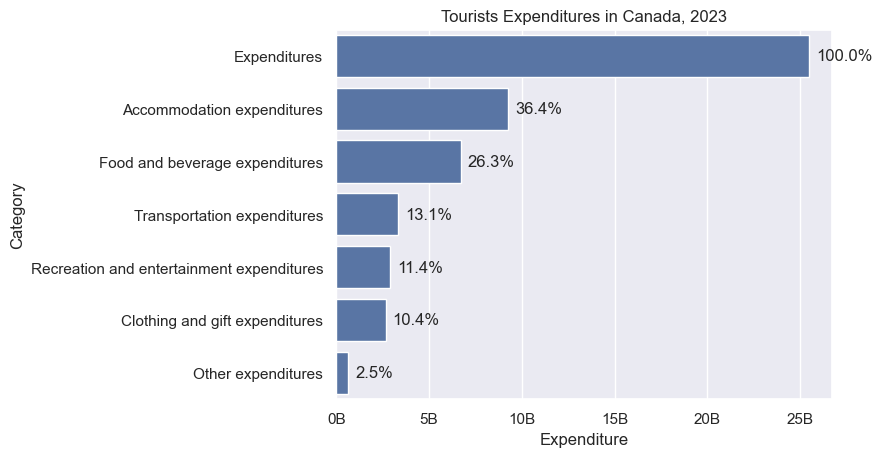

In [48]:
cond1 = df.index.year == 2023
expenditure = ["Expenditures","Accommodation expenditures","Clothing and gift expenditures",
    "Food and beverage expenditures","Recreation and entertainment expenditures",
    "Transportation expenditures","Other expenditures"]
cond2 = df['Trip statistics'].isin(expenditure)
cond3 = df['Country']=='All countries'

df2=df[cond1 & cond2 & cond3]
df3=pd.DataFrame(df2.groupby('Trip statistics')['VALUE'].sum().
                 sort_values(ascending=False))

df3=df3.rename(columns={'VALUE': 'Expenditure'})
df3=df3.rename_axis('Category')
df3.Expenditure = 1000 * df3.Expenditure

#total and percentage
total = df3.iloc[0]['Expenditure']
df3['Percentage'] = df3['Expenditure']/total


#styling
styler = df3.style.format({
    'Expenditure': '{:,.0f}',       # Thousands separator with no decimal places
    'Percentage': '{:.1%}'     # Format as percentage with 2 decimal places
})

display(styler)

# bar chart
ax = sns.barplot(data=df3,x='Expenditure',y='Category')
ax.set( title='Tourists Expenditures in Canada, 2023')
ax.xaxis.set_major_formatter(FuncFormatter(billions_formatter))

for i, p in enumerate(ax.patches):
    percentage = df3['Percentage'][i]
    ax.annotate(f'{percentage:.1%}', 
                (p.get_width(),p.get_y() + p.get_height() / 2),
                va='center', 
                xytext=(5, 0), 
                textcoords='offset points',
                bbox=dict(facecolor='white', alpha=0)) 
 


In [61]:
cond1 = df.index.year == 2023
stat = ["Expenditures per night","Nights per trip","Expenditures per trip"]
cond2 = df['Trip statistics'].isin(stat)

df1 = df[cond1 & cond2]
df2=df1.pivot_table(index='Country',columns='Trip statistics',values='VALUE',aggfunc='mean')

#styling
styler = df2.style.format({
    'Expenditures per trip': '${:,.2f}',       # Thousands separator with no decimal places
    'Expenditures per night': '${:,.2f}',       # Thousands separator with no decimal places
    'Nights per trip': '{:.1f}'     
})

print('Tourism Expenditures Statistics, 2023')
display(styler)

Tourism Expenditures Statistics, 2023


Trip statistics,Expenditures per night,Expenditures per trip,Nights per trip
Country,,,
All countries,$110.00,$909.00,8.3
Mexico,$70.50,"$1,998.25",28.7
United States,$165.75,$588.50,3.5
